In [1]:
# for pytorch
import torchvision
import torchvision . transforms as transforms
# Define data transformations ( optional , but recommended )
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5 , 0.5 , 0.5) , (0.5 , 0.5 ,0.5))])
# Load the training dataset If data set is too large to process, you may use portion of it.
train_dataset = torchvision.datasets.CIFAR10(root ='./data ', train = True , transform = transform , download =True )
# Load the testing dataset
test_dataset = torchvision.datasets.CIFAR10 ( root ='./data ', train = False , transform = transform , download =True )
# for keras
from keras . datasets import cifar10
# Load the CIFAR -10 dataset
( train_images , train_labels ) , ( test_images , test_labels ) = cifar10.load_data ()

100%|██████████| 170498071/170498071 [00:06<00:00, 28323100.90it/s]


Extracting ./data /cifar-10-python.tar.gz to ./data 
Files already downloaded and verified
170498071/170498071 [==============================] - 6s 0us/step


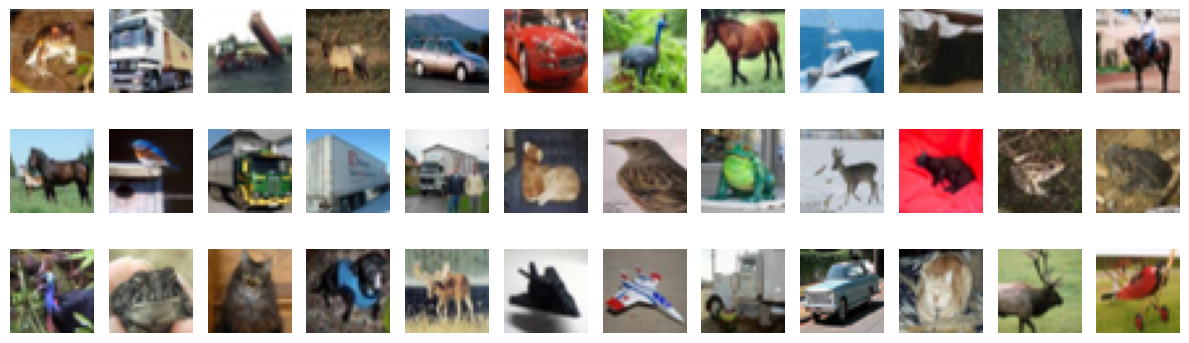

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

num_images_to_display = 36
sample_images = train_images[:num_images_to_display]
sample_labels = train_labels[:num_images_to_display]

def imshow_grid(images, labels):
    plt.figure(figsize=(12, 4))
    for i in range(num_images_to_display):
        plt.subplot(3, 12, i+1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

imshow_grid(sample_images, sample_labels)


# **Our model**

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

train, val, train_y, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Train dataset:", len(train))
print("Validation dataset:", len(val))
print("Test dataset:", len(test_dataset))

Train dataset: 40000
Validation dataset: 10000
Test dataset: 10000


In [4]:
# Normalization
train, val, test_images = train / 255.0, val / 255.0, test_images / 255.0

train_y = to_categorical(train_y, 10)
val_y = to_categorical(val_y, 10)
test_labels = to_categorical(test_labels, 10)

In [5]:
#===========================================   Basic CNN model  ==========================================================#
'''
model = models.Sequential()
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

'''
'''
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
'''
'''

model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))



model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(10, activation='softmax'))


model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
'''

# Customized CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
#===========================================================================================================================#
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                        

### Training

In [6]:
epochs = 20
batch_size = 64


history = model.fit(train, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val, val_y))

test_loss, test_acc, test_prec, test_recall = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Epoch 1/20
40/40 [==============================] - 18s 84ms/step - loss: 2.2658 - accuracy: 0.3332 - precision: 0.3992 - recall: 0.2414 - val_loss: 2.4268 - val_accuracy: 0.0933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
40/40 [==============================] - 2s 58ms/step - loss: 1.6687 - accuracy: 0.4554 - precision: 0.5474 - recall: 0.3575 - val_loss: 2.9051 - val_accuracy: 0.1345 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
40/40 [==============================] - 2s 55ms/step - loss: 1.4426 - accuracy: 0.5124 - precision: 0.6097 - recall: 0.4060 - val_loss: 3.5191 - val_accuracy: 0.1399 - val_precision: 0.2520 - val_recall: 0.0312
Epoch 4/20
40/40 [==============================] - 2s 53ms/step - loss: 1.2830 - accuracy: 0.5577 - precision: 0.6601 - recall: 0.4542 - val_loss: 4.1634 - val_accuracy: 0.0999 - val_precision: 0.1022 - val_recall: 0.0995
Epoch 5/20
40/40 [==============================] - 2s 53ms/step - loss: 1.1663 - accuracy:

### Predicting

In [7]:
y_pred = model.predict(train)
y_pred_val = model.predict(val)

313/313 [==============================] - 1s 2ms/step


In [8]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

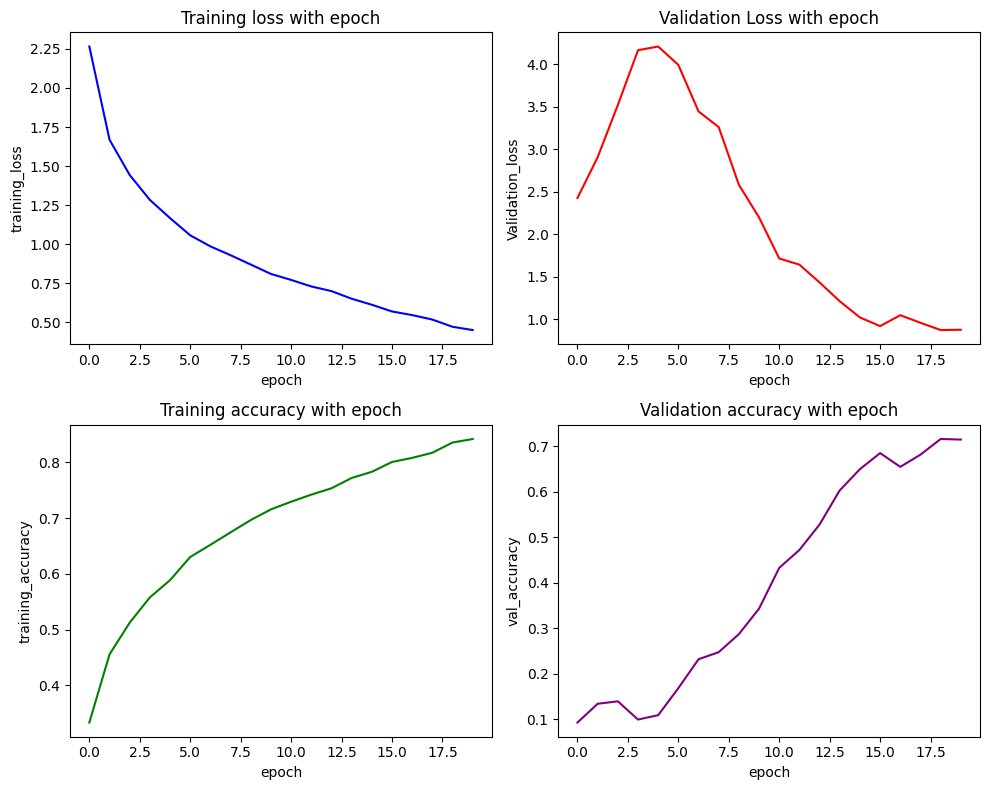

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(training_loss, color='blue')
axs[0, 0].set_title('Training loss with epoch')
axs[0, 0].set_ylabel('training_loss')
axs[0, 0].set_xlabel('epoch')

axs[0, 1].plot(val_loss, color='red')
axs[0, 1].set_title('Validation Loss with epoch')
axs[0, 1].set_ylabel('Validation_loss')
axs[0, 1].set_xlabel('epoch')

axs[1, 0].plot(training_accuracy, color='green')
axs[1, 0].set_title('Training accuracy with epoch')
axs[1, 0].set_ylabel('training_accuracy')
axs[1, 0].set_xlabel('epoch')

axs[1, 1].plot(val_accuracy, color='purple')
axs[1, 1].set_title('Validation accuracy with epoch')
axs[1, 1].set_ylabel('val_accuracy')
axs[1, 1].set_xlabel('epoch')

plt.tight_layout()

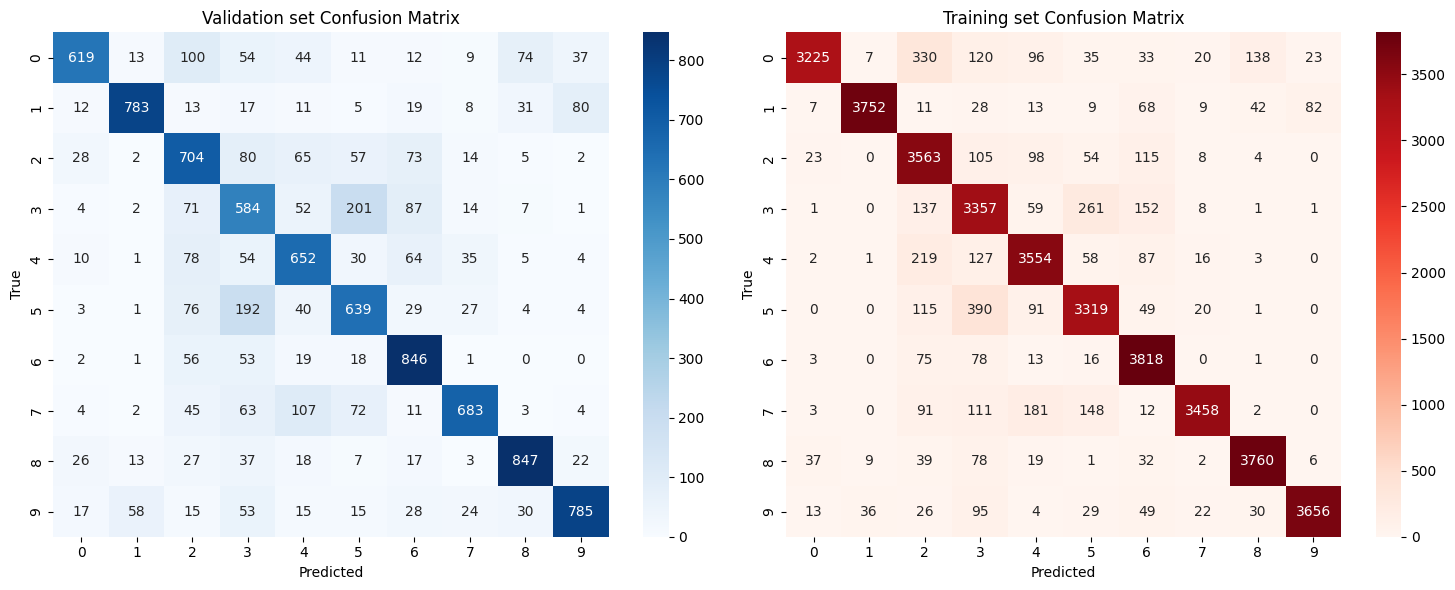

In [10]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true_binary = np.argmax(train_y, axis=1)
y_pred_binary = np.argmax(y_pred, axis=1)

y_true_ = np.argmax(val_y, axis=1)
y_pred_ = np.argmax(y_pred_val, axis=1)

cm_multi = confusion_matrix(y_true_, y_pred_)
cm_binary = confusion_matrix(y_true_binary, y_pred_binary)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_), yticklabels=np.unique(y_true_), ax=axes[0])
axes[0].set_title('Validation set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_true_binary), yticklabels=np.unique(y_true_binary), ax=axes[1])
axes[1].set_title('Training set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()


In [11]:
class MyCNNModel:
    def __init__(self):
        self.model = models.Sequential()
        self._build_model()

    def _build_model(self):
        self.model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
        self.model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(512, activation='relu'))
        self.model.add(layers.Dropout(0.5))
        self.model.add(layers.Dense(10, activation='softmax'))




    def compile_model(self, optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']):
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def summary(self):
        self.model.summary()

    def train(self, train_data, train_labels, epochs=1, batch_size=None, validation_data=None, verbose=1):
        history = self.model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=validation_data, verbose=verbose)
        return history

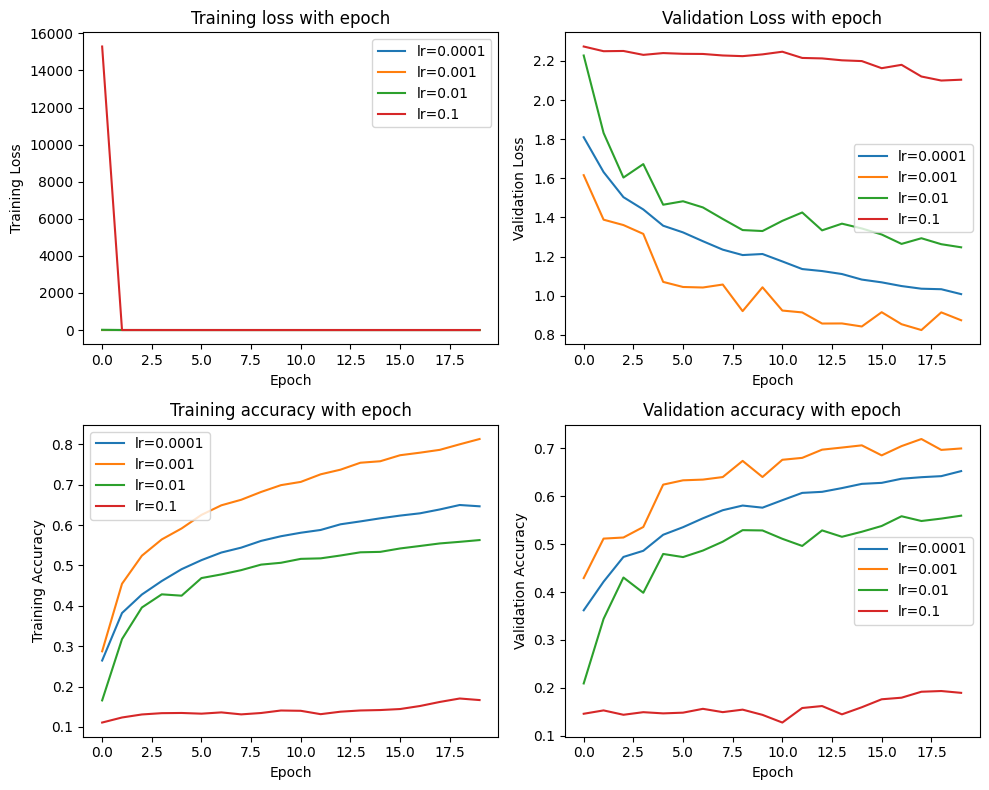

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'model' is your defined model
learning_rates = [0.0001, 0.001, 0.01, 0.1]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for lr in learning_rates:
  my_model = MyCNNModel()
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  my_model.compile_model(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  history = my_model.train(train, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val, val_y), verbose=0)

  axs[0, 0].plot(history.history['loss'], label=f'lr={lr}')
  axs[0, 1].plot(history.history['val_loss'], label=f'lr={lr}')
  axs[1, 0].plot(history.history['accuracy'], label=f'lr={lr}')
  axs[1, 1].plot(history.history['val_accuracy'], label=f'lr={lr}')

axs[0, 0].set_title('Training loss with epoch')
axs[0, 0].set_ylabel('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].legend()

axs[0, 1].set_title('Validation Loss with epoch')
axs[0, 1].set_ylabel('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].legend()

axs[1, 0].set_title('Training accuracy with epoch')
axs[1, 0].set_ylabel('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].legend()

axs[1, 1].set_title('Validation accuracy with epoch')
axs[1, 1].set_ylabel('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Transfer Learning
